## Intro
To find the best neighborhood in Pittsburgh, we need to find the best neighborhood for (hu)mans best friend which are dogs of course. To determine this, one of the metrics is **who has the most supermarkets**.

In [5]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

stores_data = pd.read_csv("data-conveniencesupermarkets.csv")

Imported in the dataset for all Supermarkets & Convenience Stores in Alleghany County

In [2]:
stores_data.head(10)

,Client ID,Name,Legal Name,Start Date,Street #,Street Name,State,Zip,Lat,Lon,Accuracy,Category
0,201211150002,Avalon Fuel,Avalon Fuel Company,10/26/2012,901,Ohio River Blvd,PA,15202.0,40.495759,-80.066508,9.0,Convenience Store
1,201511040005,Ez Energy #303/7Eleven #36183H,Neelkanth Ansh Enterprises Inc,10/26/2015,209,Ohio River Blvd,PA,15143.0,40.545418,-80.194152,9.0,Convenience Store
2,201212130003,EZ Energy #311 / 7 Eleven #36191H,7 Eleven Inc,12/3/2012,8136,Ohio River Blvd,PA,15202.0,40.510522,-80.094268,9.0,Convenience Store
3,201211190006,Getgo #3646 / Crafton - Ingram,Giant Eagle Inc,11/15/2012,280,Crafton Ingram Shopping circle,PA,15205.0,41.203322,-77.194525,3.0,Convenience Store
4,53583,Mt NeBlvd Texaco,Mt NeBlvd Texaco,6/2/1995,1706,Mt Nebo Rd,PA,15143.0,40.553281,-80.109158,8.0,Convenience Store
5,201304220008,Radokovic Marathon,Radokovic Enterprises LlC,4/16/2013,1826,Lincoln Highway,PA,15137.0,40.367923,-79.780429,9.0,Convenience Store
6,200002290002,Sunoco #7544,Sunoco Inc R&M,2/2/2000,1201,Airport Blvdulevard,PA,15231.0,40.494177,-80.267208,9.0,Convenience Store
7,52845,Sunoco A Plus Mini Market #8154,NaN,10/25/1994,5204,Interbo Ave,PA,15207.0,40.370214,-79.913195,9.0,Convenience Store
8,201310080001,Plow & Hearth,Plow & Hearth LLC,9/25/2013,1710,Settlers Ridge Center Dr,PA,15205.0,40.440641,-80.149132,5.0,Convenience Store
9,43192,S & R Market,Mac's Convenience Stores LLC,1/11/1988,4915,2nd Ave,PA,15207.0,40.529076,-80.025577,5.0,Convenience Store


These are the first ten rows of data in the dataset which incorperates the id of the store, its name, its legal name, when it opened, street number, street name, state, zip, latitude, longitude, and category.

In [13]:
query_mask = stores_data['Category'] == "Supermarket"
query_mask.head(10)

0    False
1    False
2    False
3    False
4    False
5    False
6    False
7    False
8    False
9    False
Name: Category, dtype: bool

I made a query mask to seperate convenience stores from supermarkets in our dataset. I removed convenience stores as they don't carry things like dog food according to google.

In [7]:
supermarkets_only = stores_data[query_mask]
supermarkets_only.head(10)

,Client ID,Name,Legal Name,Start Date,Street #,Street Name,State,Zip,Lat,Lon,Accuracy,Category
515,Client ID,Aldi #92,Aldi Inc,8/18/2015,5239,Brownsville Rd,PA,15236.0,40.342387,-79.984112,9.0,Supermarket
516,201508270013,Aldi,Aldi Inc,9/22/2015,7350,Saltsburg Rd,PA,15235.0,40.477243,-79.785988,9.0,Supermarket
517,201509280005,Aldi #56,Aldi Inc,7/17/2006,2348,Ardmore Blvd,PA,15221.0,40.415887,-79.848706,9.0,Supermarket
518,200607310002,Aldi #68,Aldi Inc,7/16/2010,4578,Wm Flynn Hi,PA,15101.0,40.571191,-79.952845,3.0,Supermarket
519,201007230007,Aldi #72,Aldi Inc,11/18/2010,3089,Sussex Av,PA,15226.0,40.383771,-80.014178,9.0,Supermarket
520,201011190002,Aldi #81,Aldi Inc,1/13/2015,3013,Washington Pi,PA,15017.0,40.173242,-80.241990,9.0,Supermarket
521,201501150001,Aldi #89,Aldi Inc,9/15/2015,300,Eden Park Bo,PA,15132.0,40.345050,-79.846480,3.0,Supermarket
522,201509170002,Aldi #93,Aldi Inc,7/29/2015,7221,Mcknight Rd,PA,15237.0,40.536931,-80.013056,9.0,Supermarket
523,201507270008,Aldi Store #97,Aldi Inc,10/21/2015,127,7th Av,PA,15120.0,40.407339,-79.912407,9.0,Supermarket
524,201511020011,Aldi #96,Aldi Inc Saxonburgh Div,8/19/2015,1160,Washington Av,PA,15106.0,40.397454,-80.085297,9.0,Supermarket


Here are the first ten supermarkets in our dataset

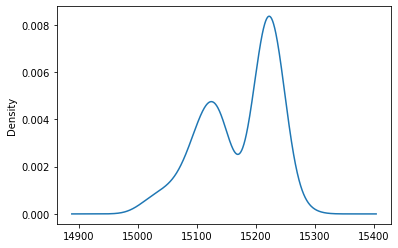

In [6]:
supermarkets_only["Zip"].plot.density()

The graph is supposed to show what range of zip codes has the most supermarkets

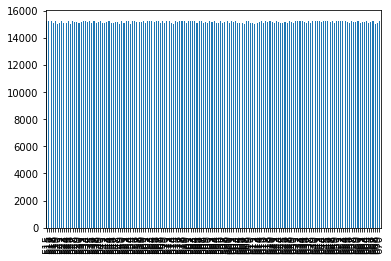

In [9]:
supermarkets_only["Zip"].plot.bar()

If we graph the data with all zip codes as the x-axis, we end up with something like this. Lots of zipcodes are in the graph and this data set includes all of Allegheny county so we must filter out only the ones in Pittsburgh.

In [7]:
supermarkets_only.groupby("Zip").count()
supermarkets_only["Zip"].value_counts()

15237.0    10
15146.0     8
15122.0     7
15205.0     6
15132.0     6
15227.0     5
15235.0     5
15210.0     4
15090.0     4
15206.0     4
15236.0     4
15222.0     4
15217.0     4
15147.0     4
15238.0     3
15212.0     3
15120.0     3
15137.0     3
15017.0     3
15106.0     3
15044.0     3
15224.0     3
15108.0     3
15221.0     3
15213.0     3
15102.0     3
15065.0     2
15101.0     2
15241.0     2
15084.0     2
15229.0     2
15275.0     2
15226.0     2
15216.0     2
15220.0     2
15203.0     2
15228.0     2
15116.0     2
15145.0     1
15136.0     1
15056.0     1
15232.0     1
15086.0     1
15037.0     1
15110.0     1
15211.0     1
15209.0     1
15239.0     1
15202.0     1
15127.0     1
15234.0     1
15143.0     1
15218.0     1
15208.0     1
15131.0     1
15201.0     1
15219.0     1
15076.0     1
15071.0     1
Name: Zip, dtype: int64

A count of how many supermarkets are in each zip code

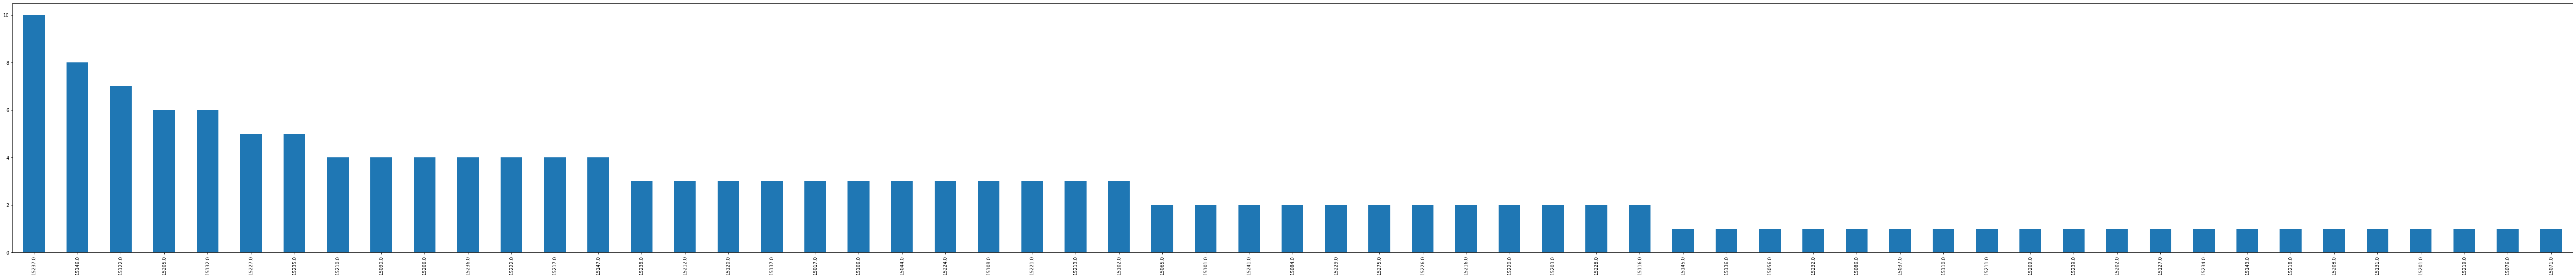

In [8]:
graph = supermarkets_only["Zip"].value_counts()
graph.plot(kind = 'bar', x= "Zip", y = "# of Supermarkets", figsize=(100,10))

A bar graph of how many supermarkets are in each zip code

In [10]:
pitt_zip = [15201.0, 15203.0, 15204.0, 15205.0, 15206.0, 15207.0, 15208.0, 15210.0, 15211.0, 15212.0, 15213.0, 15214.0, 15215.0, 15216.0, 
            15217.0, 15218.0, 15219.0, 15220.0, 15221.0, 15222.0, 15224.0, 15226.0, 15227.0, 15230.0, 15232.0, 15233.0, 15234.0, 15235.0]

The list above contains all the zip codes considered part of Pittsburgh according to a government pdf containing zip codes that belong to the Pittsburgh neighborhoods.

In [9]:
def filter_out_zips(grouped):
    for x in pitt_zip:
        if grouped.iloc[0, 7] == x:
            return True
    return False

only_pitt_zip = supermarkets_only.groupby("Zip").filter(filter_out_zips)
only_pitt_zip.groupby("Zip").count()

,Client ID,Name,Legal Name,Start Date,Street #,Street Name,State,Lat,Lon,Accuracy,Category
Zip,,,,,,,,,,,
15201.0,1,1,1,1,1,1,1,1,1,1,1
15203.0,2,2,2,2,2,2,2,2,2,2,2
15205.0,6,6,4,6,5,6,6,6,6,6,6
15206.0,4,4,4,4,4,4,4,4,4,4,4
15208.0,1,1,1,1,1,1,1,1,1,1,1
15210.0,4,4,2,4,4,4,4,4,4,4,4
15211.0,1,1,1,1,1,1,1,1,1,1,1
15212.0,3,3,3,3,3,3,3,3,3,3,3
15213.0,3,3,2,3,3,3,3,3,3,3,3


I filtered out all the zip codes that don't belong to a neighbor hood in Pittsburgh and seems like 15205, 15227, 15235 have the most.

In [33]:
only_pitt_zip.head(10)

,Client ID,Name,Legal Name,Start Date,Street #,Street Name,State,Zip,Lat,Lon,Accuracy,Category
516,201508270013,Aldi,Aldi Inc,9/22/2015,7350,Saltsburg Rd,PA,15235.0,40.477243,-79.785988,9.0,Supermarket
517,201509280005,Aldi #56,Aldi Inc,7/17/2006,2348,Ardmore Blvd,PA,15221.0,40.415887,-79.848706,9.0,Supermarket
519,201007230007,Aldi #72,Aldi Inc,11/18/2010,3089,Sussex Av,PA,15226.0,40.383771,-80.014178,9.0,Supermarket
525,201508140001,Shop 'n Save #1076 Mt. Washington,"B C Hanna Foods, Inc",5/13/1984,125,Virginia Av,PA,15211.0,40.429437,-80.008009,9.0,Supermarket
527,44034,Giant Eagle #652,Brickers LLC,8/29/2008,318,Cedar Ave,PA,15212.0,40.451602,-79.999575,9.0,Supermarket
529,200209130006,Costco #332,Costco Wholesale Corp,7/1/2002,202,Costco Dr,PA,15205.0,40.458793,-80.165860,9.0,Supermarket
532,200702260003,Whitehall Asian Supermarket,Dhari Lal Dhital,4/20/2012,1406,Radford Rd,PA,15227.0,40.363877,-79.967841,8.0,Supermarket
533,201204270004,Donatelli's Italian Food Center,Donatelli's Italian Food Center Inc,7/29/1988,4711,Liberty Ave,PA,15224.0,40.462070,-79.949355,9.0,Supermarket
534,43796,Shop 'n Save,DTJ Foods,7/27/1999,450,56th St,PA,15201.0,40.483141,-79.948537,9.0,Supermarket
535,199908020002,East End Food Co-Op,East End Food Co-Op Inc,5/8/1986,7516,Meade St,PA,15208.0,40.448199,-79.895475,9.0,Supermarket


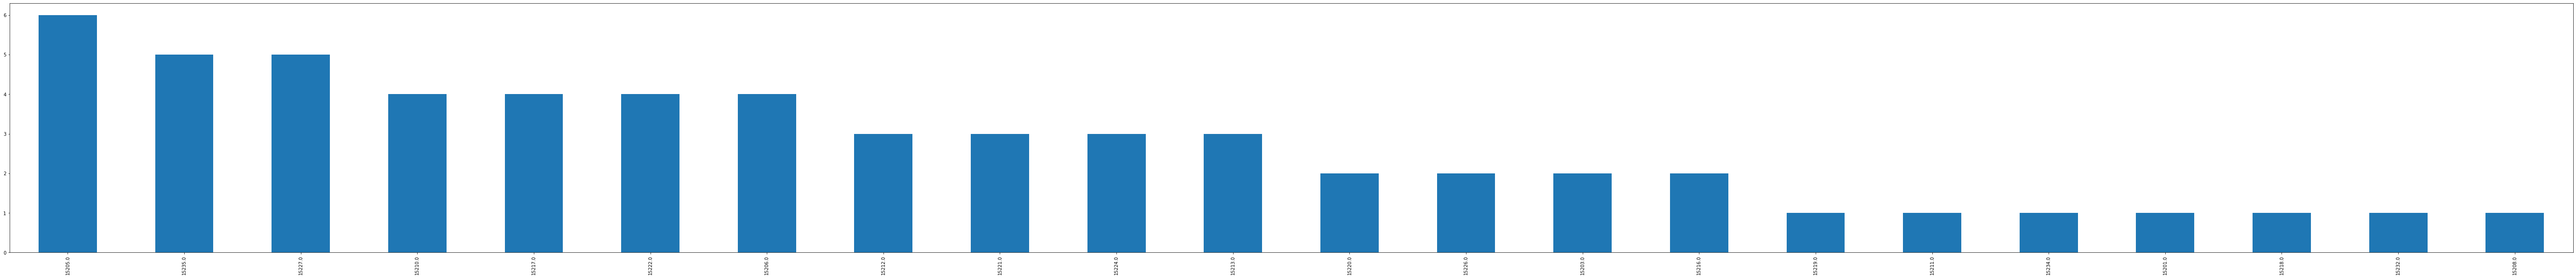

In [11]:
graph2 = only_pitt_zip["Zip"].value_counts()
graph2.plot(kind = 'bar', x= "Zip", y = "# of Supermarkets", figsize=(100,10))

This is a graph of how many supermarkets are in each zip code. The top 3 are 15205, 15235, 15227.

In [12]:
rankings = only_pitt_zip["Zip"].value_counts()/6
print(rankings)

15205.0    1.000000
15235.0    0.833333
15227.0    0.833333
15210.0    0.666667
15217.0    0.666667
15222.0    0.666667
15206.0    0.666667
15212.0    0.500000
15221.0    0.500000
15224.0    0.500000
15213.0    0.500000
15220.0    0.333333
15226.0    0.333333
15203.0    0.333333
15216.0    0.333333
15219.0    0.166667
15211.0    0.166667
15234.0    0.166667
15201.0    0.166667
15218.0    0.166667
15232.0    0.166667
15208.0    0.166667
Name: Zip, dtype: float64


Here are the rankings of each zip code where 6 is the most supermarkets in one zip code among all the zip codes. 
We divide the total number of supermarkets in one zip by 6 to get our rankings.

# Conclusion
**In the same zip code with the most supermarkets(15205)** is *Fairywood, Crafton Heights, Westwood, Oakwood.* The code **15235** has *Penn Hills, Churchill, and Wilkins Township.* The code **15227** contain *Baldwin and Brentwood.* **15210** has *Beltzhoover, Knoxville, Southside Slopes, MT. Oliver, Carrick, St.Clair, Arlington.* **15217** has *Squirrel Hill.* **15222** has *Downtown, and the Strip.* **15206** has *East Liberty.* **15235** and **15227** both have **5 supermarkets** while **15210, 15217, 15222,** and **15206** have **four supermarkets** each.

**15205 is the best zip code for dogs** because it has the most supermarkets which are *the neighborhoods of Fairywood, Crafton Heights, Westwood, Oakwood.*